<a href="https://colab.research.google.com/github/PedroJesusBenito/predicciones-de-ventas/blob/main/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a trabajar con estos datos

**Lo primero será montar el drive**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Luego cargamos las bibliotecas**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Ahora vamos a cargar el dataset a trabajar**

In [103]:
ventas= "/content/drive/MyDrive/Data Sets/sales_predictions_2023.csv"
df= pd.read_csv(ventas)

**Comprovamos que haya cargado bien**

In [104]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


**Ahora vamos a traer el diccionario del dataset**

# Diccionario del dataset

Nombre de la variable

Descripción

Item_Identifier

Identificación única del producto

Item_Weight

Peso del producto

Item_Fat_Content

Si el producto es bajo en grasa o regular

Item_Visibility

Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto

Item_Type

Categoría a la que el producto pertenece

Item_MRP

Precio máximo de venta al público (precio de catálogo) del producto

Outlet_Identifier

Identificación única de la tienda

Outlet_Establishment_Year

El año en que se estableció la tienda

Outlet_Size

El tamaño de la tienda en cuanto al área total

Outlet_Location_Type

El tipo de área donde se encuentra la tienda

Outlet_Type

Si el punto de venta es una tienda de comestibles o algún tipo de supermercado

Item_Outlet_Sales

Ventas del producto en una tienda particular. Es la variable objetivo a predecir.



**Ya que no pudimos traer la tabla, la imformación está desordenada y el diccionario pierde su propósito. Vamos a corregir la presentación del diciconario:**

In [105]:
#Ordenemos este diccionario haciendo un dataframe con su información
diccionario = pd.DataFrame()

In [106]:
#Comprobamos
diccionario

""


In [107]:
#Creamos la primera columna:
diccionario["Nombre de la variable"] = ["Item_Identifier", "Item_Weight", "Item_Fat_Content", "Item_Visibility", "Item_Type", "Item_MRP",
                                        "Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type",
                                        "Outlet_Type", "Item_Outlet_Sales"]

In [108]:
#Comprobamos
diccionario

,Nombre de la variable
0,Item_Identifier
1,Item_Weight
2,Item_Fat_Content
3,Item_Visibility
4,Item_Type
5,Item_MRP
6,Outlet_Identifier
7,Outlet_Establishment_Year
8,Outlet_Size
9,Outlet_Location_Type


In [109]:
#Y luego creamos la segunda columna:
diccionario["Descripción"] = ["Identificación única del producto", "Peso del producto", "Si el producto es bajo en grasa o regular",
                              "Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto",
                              "Categoría a la que el producto pertenece", "Precio máximo de venta al público (precio de catálogo) del producto",
                              "Identificación única de la tienda", "El año en que se estableció la tienda", "El tamaño de la tienda en cuanto al área total",
                              "El tipo de área donde se encuentra la tienda", "Si el punto de venta es una tienda de comestibles o algún tipo de supermercado",
                              "Ventas del producto en una tienda particular. Es la variable objetivo a predecir."]

In [110]:
#Comprobamos
diccionario.head(3)

,Nombre de la variable,Descripción
0,Item_Identifier,Identificación única del producto
1,Item_Weight,Peso del producto
2,Item_Fat_Content,Si el producto es bajo en grasa o regular


ahora sí:

# Diccionario del dataset

In [111]:
diccionario

,Nombre de la variable,Descripción
0,Item_Identifier,Identificación única del producto
1,Item_Weight,Peso del producto
2,Item_Fat_Content,Si el producto es bajo en grasa o regular
3,Item_Visibility,Porcentaje de la superficie total de exposició...
4,Item_Type,Categoría a la que el producto pertenece
5,Item_MRP,Precio máximo de venta al público (precio de c...
6,Outlet_Identifier,Identificación única de la tienda
7,Outlet_Establishment_Year,El año en que se estableció la tienda
8,Outlet_Size,El tamaño de la tienda en cuanto al área total
9,Outlet_Location_Type,El tipo de área donde se encuentra la tienda


[texto del enlace](https://)# Vamos a explorar el dataset

**1)¿Cuántas filas y columnas?**

In [112]:
df.shape

(8523, 12)

Tenemos 8523 filas y 12 columnas, es un data ser muy completo

**2) ¿Cuáles son los tipos de datos en cada variable?**

In [113]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Dada la información que nos entrega el diccionario, el tipo de dato está en linea con lo esperado

**3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.**

In [114]:
df.duplicated().sum()

0

No encontramos ningún duplicado en todas las columnas, seguimos explorando

**4) Identifiquen los valores faltantes.**

In [115]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Encontramos 1463 valores faltantes en la columna "Item_Weight" y 2410 datos faltantes en la columna "Outlet_Size"
Lo primero que vamos a hacer es revisar el porcentaje que representan estos faltantes el total de los datos

In [116]:
((df["Item_Weight"].isna().sum()*100)/df.shape[0]).round(1)

17.2

Los datos faltentas de la columna "Item_Wheight" representan un 17,2% del total. Es un porcentaje demasiado alto para eliminar

In [117]:
((df["Outlet_Size"].isna().sum()*100)/df.shape[0]).round(1)

28.3

Los datos faltentas de la columna "Outlet_Size" representan un 28.3% del total. Al igual que en el caso anterior, es un porcentaje demasiado alto para eliminar y aún más alto que el anterior.

**5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).**

Lo primero que vamos a hacer es intentar recuperar algunos de esos datos. Para ello, vamos a analizar más en profundidad las columnas con datos faltantes: "Item_Wheight" y "Outlet_Size"

Lo primero será saber cuántos valores únicos hay dentro de cada una de las columnas con datos faltantes

In [118]:
df["Item_Identifier"].nunique()

1559

In [119]:
df["Outlet_Size"].nunique()

3

Podemos ver que la cantidad de valores únicos de la columna "Outlet_Size" son 3, lo que es muchísimo menos que la cantidad de su contraparte "Item_Identifier" que tiene 1559 valores únicos.
Siendo este el caso, vamos a comenzar analizando la columna "Outlet_Size".
Veamos cuáles son sus valores

In [120]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Ya sabemos los valores únicos y vemos que son acorde a su columna. Sin embargo, estos datos no nos ayudan a llenar los faltantes. Vamos a revisar el diccionario del dataset en busca de una guía

In [121]:
#Al haber convertido nuestro diccionario en un DataFrame, lo podemos llamar a conveniencia
diccionario

,Nombre de la variable,Descripción
0,Item_Identifier,Identificación única del producto
1,Item_Weight,Peso del producto
2,Item_Fat_Content,Si el producto es bajo en grasa o regular
3,Item_Visibility,Porcentaje de la superficie total de exposició...
4,Item_Type,Categoría a la que el producto pertenece
5,Item_MRP,Precio máximo de venta al público (precio de c...
6,Outlet_Identifier,Identificación única de la tienda
7,Outlet_Establishment_Year,El año en que se estableció la tienda
8,Outlet_Size,El tamaño de la tienda en cuanto al área total
9,Outlet_Location_Type,El tipo de área donde se encuentra la tienda


Podemos ver que hay una identificación única de la tienda, quizás estos valores nos puedan dar alguna pista con respecto a nuestros datos faltantes

In [122]:
diccionario.iloc[6:7, :]

,Nombre de la variable,Descripción
6,Outlet_Identifier,Identificación única de la tienda


Revisemos más en detalle esta columna

In [123]:
df["Outlet_Identifier"].nunique()

10

Tenemos 10 valores únicos, veámoslos

In [124]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Revisemos uno de  estos valores en busca de alguna información sobre nuestros datos faltantes

In [125]:
df[df["Outlet_Identifier"] == "OUT027"].iloc[:, 6:9]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size
7,OUT027,1985,Medium
18,OUT027,1985,Medium
21,OUT027,1985,Medium
36,OUT027,1985,Medium
38,OUT027,1985,Medium
...,...,...,...
8472,OUT027,1985,Medium
8485,OUT027,1985,Medium
8487,OUT027,1985,Medium
8488,OUT027,1985,Medium


Podemos ver que el tamaño de la tienda "OUT027" es siempre "Medium", por lo tanto ya encontramos una correlación y ahora podemos rellenar con este valor los faltantes para este outlet. ¿Pasará lo mismo con los items?

In [126]:
#Traigamos el diccionario
diccionario

,Nombre de la variable,Descripción
0,Item_Identifier,Identificación única del producto
1,Item_Weight,Peso del producto
2,Item_Fat_Content,Si el producto es bajo en grasa o regular
3,Item_Visibility,Porcentaje de la superficie total de exposició...
4,Item_Type,Categoría a la que el producto pertenece
5,Item_MRP,Precio máximo de venta al público (precio de c...
6,Outlet_Identifier,Identificación única de la tienda
7,Outlet_Establishment_Year,El año en que se estableció la tienda
8,Outlet_Size,El tamaño de la tienda en cuanto al área total
9,Outlet_Location_Type,El tipo de área donde se encuentra la tienda


Vamos a revisar la columna "Item_Identifier"

In [127]:
diccionario.iloc[6:7, :]

,Nombre de la variable,Descripción
6,Outlet_Identifier,Identificación única de la tienda


Esta columna tenía muchos valores únicos, recordemos cuántos

In [128]:
df["Item_Identifier"].nunique()

1559

Veamos cuáles son

In [129]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Repitamos el ejercicio anterior de comparar algún valor único con la columna donde faltan datos "Item_Weight"

In [130]:
df[df["Item_Identifier"] == "FDW13"].iloc[:, 0:2]

,Item_Identifier,Item_Weight
256,FDW13,8.5
1141,FDW13,8.5
2190,FDW13,8.5
3928,FDW13,NaN
3978,FDW13,8.5
6499,FDW13,8.5
6587,FDW13,8.5
7029,FDW13,8.5
8025,FDW13,NaN
8032,FDW13,8.5


Podemos ver que se cumple el mismo tipo de correlación: Dado que las columnas "Identifier" nos permiten identificar un producto o una tienda en específico, esto permite que podamos rellenar todos nuestros datos faltantes con la información de otra fila con el mismo identificador.
Esto presenta un desafío, ya que al ser tantos valores específicos, tomaría mucho tiempo digitar uno a uno sus valores. Vamos a buscar una forma de automatizar este proceso

In [131]:
#buscamos acceder a los valores de "Item_Weight" para cada valor único de "Item_Identifier". Partamos con uno
df[df["Item_Identifier"] == "FDW13"].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832


Ahora necesitamos una forma de llenar cada valor falta de la columna "Item_Weight" con el valor correspondiente a su identificador de la columa "Item_Identifier" y esto lo haremos unsando GroupBy para relacionar estas dos columas y usaremos .transform para obtener la media de los pesos para cada identificador y que de esta forma imputemos los valores de forma correcta


In [132]:
df["Item_Weight"].fillna(df.groupby(["Item_Identifier"])["Item_Weight"].transform("mean"), inplace=True)

Comprobamos

In [133]:
df["Item_Weight"].isna().sum()

4

¡Muy bien! Pudimos bajar la cuenta de datos faltantes de esta columna de 1463 a tan sólo 4 registros. Revisemos cuáles son

In [134]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Que nuestra operación para imputar los datos faltantes no haya funcionado con estos registros nos dice que estos deben estar una sola vez, la que podemos ver en la linea anterior. Comprobemos

In [135]:
df[(df["Item_Identifier"] == "FDN52") | (df["Item_Identifier"] == "FDK57") | (df["Item_Identifier"] == "FDE52") | (df["Item_Identifier"] == "FDQ60")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Efectivamente, estos valores sólo están presentes una vez y por lo tanto no fue posible imputar el "Item_Weight" basado en otros registros con su mismo identificador porque no los hay. Revisemos qué porcentaje de nuestro dataset representan estos registros

In [136]:
((df["Item_Weight"].isna().sum()*100)/df.shape[0]).round(3)

0.047

Vemos que estos 4 regisros con valores faltantes representan un 0.047% de los datos, un número que no tiene gran impacto en el dataset. Dado que no tenemos otra forma de imputar estos datos y el pequeño porcentaje que estos registros representan de nuestro total es que vamos a eliminar estas cuatro filas.

In [137]:
df.dropna(subset=["Item_Weight"], inplace=True)

Comprobamos

In [138]:
df["Item_Weight"].isna().sum()

0

Ahora aplicamos este mismo proceso en las columnas relacionadas a los establecimientos haciendo algunos cambios, ya que antes usamos la media para imputar los faltanes y como esta vez los valores que faltan son categóricos, no podemo usar ese método. En cambio, vamos a usar la moda y para poder hacer esto, vamos a usar Lambda para aplicarla a cada parte del GroupBy usando.transform ya que no nos permite usarla directamente

In [139]:
df["Item_Weight"].fillna(df.groupby(["Item_Identifier"])["Item_Weight"].transform(lambda x: x.mode().iloc[0]), inplace=True)

Comprobamos

In [140]:
df["Outlet_Size"].isna().sum()

2410

No funcionó. Intentemos usando el máximo para ver si el problema es el código o hay algo más

In [141]:
df["Outlet_Size"].fillna(df.groupby(["Outlet_Identifier"])["Outlet_Size"].max(), inplace=True)

Comprobamos

In [142]:
df["Outlet_Size"].isna().sum()

2410

Los resultados indican que el problema es diferente al que teníamos con los items, sigamos explorando para entender qué lo que ocurre con los establecimientos

In [143]:
df.groupby(["Outlet_Identifier"])["Outlet_Size"].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Podemos ver que hay tres establecimientos que muestran que su máximo es NaN, entonces vamos a crear una variable filtrada por establecimiento y buscaremos sus valores

In [144]:
df_OUT010 = df[df["Outlet_Identifier"] == "OUT010"]
df_OUT010["Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

Podemos ver que no nos arroja ningún valor, es decir, para el establecimiento seleccionado no hay datos respecto del tamaño. Lo mismo debe ocurrir con los otros dos establecimientos que presentan su máximo como valor faltante. Comprobemos

In [145]:
df_OUT017 = df[df["Outlet_Identifier"] == "OUT017"]
df_OUT017["Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [146]:
df_OUT045 = df[df["Outlet_Identifier"] == "OUT045"]
df_OUT045["Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

Ya podemos ver por qué la solución que usamos con los productos no es aplicable aquí. Vamos a buscar otro tipo de correlación entre los datos de las columnas relacionadas a los establecimientos para poder imputar los datos faltantes.

In [147]:
df_OUT010.iloc[:,6:]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...
8400,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [148]:
df_OUT010["Outlet_Establishment_Year"].unique()

array([1998])

In [149]:
df_OUT010["Outlet_Location_Type"].unique()

array(['Tier 3'], dtype=object)

In [150]:
df_OUT010["Outlet_Type"].unique()

array(['Grocery Store'], dtype=object)

Podemos ver que los datos en las columnas "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type" y "Outlet_type" son constantes para cada establecimiento, así que buscaremos establecer alguna relación entre estas columnas y lo primero que haremos será analizar más a fondo las columnas "Outlet_type" y "Outlet_Location_Type"



In [151]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [152]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Tenemos 3 tipos en "Outlet_Location_Type" y 4 tipos en "Outlet_Type", lo que es un buen indicador ya que al tener un número parecido posibles valores podríamos encontrar una relación.

Vamos a filtrar nuestro DataFrame primero por "Outlet_Size" y veremos su relación con los las columnas "Outlet_Location_Type" y "Outlet_Type"

In [153]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Creamos los filtros

In [154]:
filtro_small = df["Outlet_Size"] == "Small"
filtro_medium = df["Outlet_Size"] == "Medium"
filtro_high = df["Outlet_Size"] == "High"

Creamos un DataFrame auxiliar que tenga sólo las columnas que necesitamos

In [155]:
df_outlets = df.iloc[:,[6,8,9,10]]

Creamos otro DataFrame auxiliar que contenga sólo los establecimientos "Small"

In [156]:
df_outlets_small = df_outlets[filtro_small]

Comprobamos

In [157]:
df_outlets_small.head(3)

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
11,OUT046,Small,Tier 1,Supermarket Type1
13,OUT046,Small,Tier 1,Supermarket Type1
15,OUT046,Small,Tier 1,Supermarket Type1


Veamos ahora cuántos valores únicos hay dentro de las otras columnas en nuestro DataFrame de establecimientos pequeños

In [158]:
df_outlets_small["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 2'], dtype=object)

In [159]:
df_outlets_small["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store'], dtype=object)

Podemos ver que tenemos menos valores únicos pero aún no encontramos las relaciones que estamos buscando.

Vamos a crear dos nuevos DataFrame auxiliares, esta vez sobre "Outlet_Location_Type"

Creamos los filtros

In [160]:
filtro_tier1 = df_outlets_small["Outlet_Location_Type"] == "Tier 1"
filtro_tier2 = df_outlets_small["Outlet_Location_Type"] == "Tier 1"

Ahora creamos nuestro primer DataFrame auxiliar

In [161]:
df_tier1 = df_outlets_small[filtro_tier1]

Comprobamos

In [162]:
df_tier1.head(3)

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
11,OUT046,Small,Tier 1,Supermarket Type1
13,OUT046,Small,Tier 1,Supermarket Type1
15,OUT046,Small,Tier 1,Supermarket Type1


Veamos cuántos valores únicos hay en la columna "Outlet_Type"

In [163]:
df_tier1["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store'], dtype=object)

Podemos ver que dentro de todos estos filtros se encuentran dos valores: "Supermarket Type1" y "Grocery Store" y ahora los vamos a usar para ver si la relación que vemos con las otras columnas se mantiene si filtramos de manera inversa

In [164]:
df_supermarket_type1 = df_outlets[df_outlets["Outlet_Type"] == "Supermarket Type1"]
df_supermarket_type1

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
2,OUT049,Medium,Tier 1,Supermarket Type1
4,OUT013,High,Tier 3,Supermarket Type1
6,OUT013,High,Tier 3,Supermarket Type1
8,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...
8517,OUT046,Small,Tier 1,Supermarket Type1
8518,OUT013,High,Tier 3,Supermarket Type1
8519,OUT045,NaN,Tier 2,Supermarket Type1
8520,OUT035,Small,Tier 2,Supermarket Type1


Usando "Supermarket Type1" no es posible ver ningún tipo de relación ya que este tipo de establecimiento se encuentra en otros tamaños y
tipos de ubicación

In [165]:
df_grocery_store = df_outlets[df_outlets["Outlet_Type"] == "Grocery Store"]
df_grocery_store

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,OUT010,NaN,Tier 3,Grocery Store
23,OUT019,Small,Tier 1,Grocery Store
28,OUT010,NaN,Tier 3,Grocery Store
29,OUT019,Small,Tier 1,Grocery Store
30,OUT010,NaN,Tier 3,Grocery Store
...,...,...,...,...
8473,OUT010,NaN,Tier 3,Grocery Store
8480,OUT019,Small,Tier 1,Grocery Store
8486,OUT010,NaN,Tier 3,Grocery Store
8490,OUT019,Small,Tier 1,Grocery Store


Estos resultados se ven más prometedores. Analizemos más a fondo los resultados usando GroupBy para ver la relación entre "Outlet_Type" y "Outlet_Size"

In [166]:
df.groupby(["Outlet_Type", "Outlet_Size", "Outlet_Location_Type"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Location_Type                   
Grocery Store     Small       Tier 1                       340.746838
Supermarket Type1 High        Tier 3                      2298.995256
                  Medium      Tier 1                      2348.354635
                  Small       Tier 1                      2277.844267
                              Tier 2                      2438.841866
Supermarket Type2 Medium      Tier 3                      1995.498739
Supermarket Type3 Medium      Tier 3                      3695.781505

Podemos ver que "Grocery Store" sólo tiene otro registro de tamaño "Small". Tener un solo registro no es suficiente para establecer una tendencia, sin embargo, aquí usaremos nuestro conocimiento del área para determinar que una "Grocery Store" o tienda de comestibles sí corresponde al tamaño pequeño y, por lo tanto, imputaremos el valor "Small" a los faltantes que pertecen a ese "Outlet_Type"

Veamos primero cuántos faltantes tenemos en esta columna

In [167]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Veamos cuántos de ellos vamos a resolver

In [168]:
df[df_outlets["Outlet_Type"] == "Grocery Store"].isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

Recordemos qué tiendas son las que presentan datos faltantes

In [175]:
df.groupby(["Outlet_Identifier"])["Outlet_Size"].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Para "OUT010" ya econtramos un tamaño. Sigamos con "OUT017"

In [185]:
df[df["Outlet_Identifier"] == "OUT017"].iloc[0:1, [6,8,9,10]]

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
9,OUT017,NaN,Tier 2,Supermarket Type1


Vemos que este establecimiento  es "Supermarket Type1" con ubicación "Tier 2".

Ahora busquemos "OUT045"

In [186]:
df[df["Outlet_Identifier"] == "OUT017"].iloc[0:1, [6,8,9,10]]

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
9,OUT017,NaN,Tier 2,Supermarket Type1


Vemos que este establecimiento también es "Supermarket Type1" con ubicación "Tier 2". Usemos GRoupBy para buscar relaciones en nuestros datos

In [187]:
df.groupby(["Outlet_Type", "Outlet_Location_Type", "Outlet_Size"])[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Size                   
Grocery Store     Tier 1               Small               340.746838
Supermarket Type1 Tier 1               Medium             2348.354635
                                       Small              2277.844267
                  Tier 2               Small              2438.841866
                  Tier 3               High               2298.995256
Supermarket Type2 Tier 3               Medium             1995.498739
Supermarket Type3 Tier 3               Medium             3695.781505

Podemos ver que para "Supermarket Type1" "Tier 2" sólo tenemos "Small". Debido a que el diccionario no entrega mayor información sobre la distinción en sus categorías "Outlet_Type" ni de "Outlet_Location_Type" no podemos usar los mismos métodos que en caso anterior. Busquemos más información

In [201]:
df.groupby(["Outlet_Establishment_Year", "Outlet_Type", "Outlet_Location_Type", "Outlet_Size", "Outlet_Identifier"], dropna=False)[["Item_Outlet_Sales"]].mean()

Item_Outlet_Sales
Outlet_Establishment_Year Outlet_Type       Outlet_Location_Type Outlet_Size Outlet_Identifier                   
1985                      Grocery Store     Tier 1               Small       OUT019                    340.746838
                          Supermarket Type3 Tier 3               Medium      OUT027                   3695.781505
1987                      Supermarket Type1 Tier 3               High        OUT013                   2298.995256
1997                      Supermarket Type1 Tier 1               Small       OUT046                   2277.844267
1998                      Grocery Store     Tier 3               NaN         OUT010                    339.351662
1999                      Supermarket Type1 Tier 1               Medium      OUT049                   2348.354635
2002                      Supermarket Type1 Tier 2               NaN         OUT045                   2192.384798
2004                      Supermarket Type1 Tier 2               Small       OUT035                   2438.841866
2007                      Supermarket Type1 Tier 2               NaN         OUT017                   2340.675263
2009                      Supermarket Type2 Tier 3               Medium      OUT018                   1995.498739

Calculemos el porcentaje de variación de ventas de OUT045 y OUT017 con respecto a OUT035 que es nuestro dato guía

In [211]:
((2438.841866 - 2192.384798)*100)/2438.841866

10.105496032189244

In [212]:
((2438.841866 - 2340.675263)*100)/2438.841866

4.025131943507489

En este caso podemos ver que los tres establecimientos de "Tier 2" son "Supermarket Type1", que fueron establecidos con 2 y tres años de diferencia y que sus medias de ventas varían menos de un 10.2%.

 Es por esto que vamos a imputar el valor "Small" para el tamaño de estos dos faltantes usando la misma función que intentamos usar inicialmente sólo que esta vez relacionando la moda de "Outlet_Size" según "Outlet_Type"

In [215]:
df["Outlet_Size"].fillna(df.groupby(["Outlet_Type"])["Outlet_Size"].transform(lambda x: x.mode().iloc[0]), inplace=True)

Comprobamos

In [216]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Confirme que no hay valores faltantes después de tratarlos.**

Muy bien, hemos eliminado por completo todos los valores faltantes. Comprobemos que nuestra función haya llenado los valores faltantes de forma correcta

In [217]:
df.groupby(["Outlet_Identifier"])["Outlet_Size"].max()

Outlet_Identifier
OUT010     Small
OUT013      High
OUT017     Small
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045     Small
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

**Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)**

Revisemos columna a columna, excluiremos de estas revisión las columnas indentificadoras "Item_identifier" y "Outlet_identifier" dado que son columnas que ya trabajamos

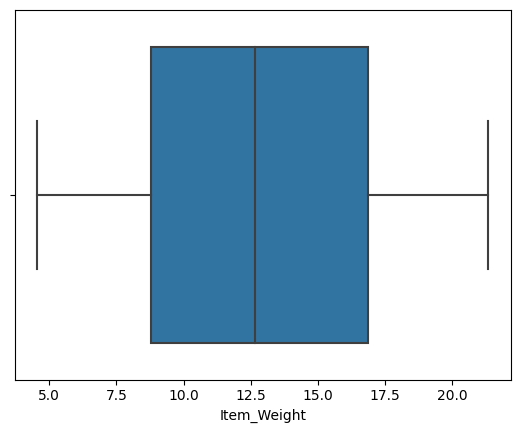

In [222]:
sns.boxplot(x="Item_Weight", data=df);

Todo en orden

In [226]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Podemos ver que en esta columna hay algunas inconsistencias. Vamos a reemplazar "low fat" y "LF" por "Low Fat" y "reg" por "Regular".

In [231]:
df["Item_Fat_Content"].replace(["low fat","LF"], "Low Fat", inplace=True)

Verificamos

In [232]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

Ahora la segunda parte

In [233]:
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)

Verificamos

In [234]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Inconsistencias solucionadas, continuamos revisando

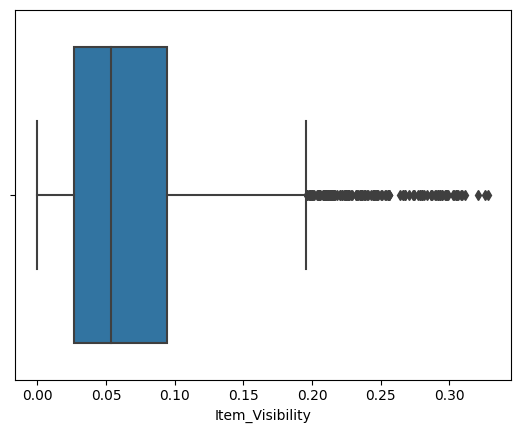

In [225]:
sns.boxplot(x="Item_Visibility", data=df);

Podemos ver que los valores se encuentran dentro de lo esperado para porcentajes(entre 0 y 1 o entre 0 y 100, según el formato). Llama la atención que tratándose de visibilidad de un producto dentro de una tienda hayan algunos que tengan visibilidad cero. Veamos si este cero es real o sólo un valor muy cercano a cero usando la función describe

In [236]:
df["Item_Visibility"].describe()

count    8519.000000
mean        0.066112
std         0.051586
min         0.000000
25%         0.026983
50%         0.053925
75%         0.094558
max         0.328391
Name: Item_Visibility, dtype: float64

Vemos que efectivamente es cero. Esto no es esperado, ya que todo producto para venderse dentro de una tienda debe ser exhibido, a menos que este se venda de forma digital en cuyo caso debería trasladarse la visibilidad de la tienda física a la tienda virtual, por lo que sigue siendo un valor extraño. Veamos cuántos registros son usando value_counts

In [238]:
df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.107037      2
0.061271      2
0.046825      2
           ... 
0.056387      1
0.013957      1
0.110460      1
0.124646      1
0.044878      1
Name: Item_Visibility, Length: 7876, dtype: int64

Tenemos 526 registros con visibilidad cero. Esto no es ideal, ya que si queremos relacionar la visibilidad de un producto con respecto a las ventas este es un valor que podría complicar el modelo. Revisemos a cuántos items y tiendas corresponden estos valores y veamos si podemos encontrar que hubo un error y corregirlo si corresponde

In [248]:
df[df["Item_Visibility"]==0.000000].sort_values(by="Item_Identifier")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1693,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.6154,OUT045,2002,Small,Tier 2,Supermarket Type1,3829.0158
5609,DRA59,8.270,Regular,0.0,Soft Drinks,183.2924,OUT017,2007,Small,Tier 2,Supermarket Type1,2406.2012
576,DRB48,16.750,Regular,0.0,Soft Drinks,39.3822,OUT046,1997,Small,Tier 1,Supermarket Type1,353.5398
2545,DRC13,8.260,Regular,0.0,Soft Drinks,122.5730,OUT045,2002,Small,Tier 2,Supermarket Type1,739.0380
...,...,...,...,...,...,...,...,...,...,...,...,...
3863,NCZ18,7.825,Low Fat,0.0,Household,253.4698,OUT017,2007,Small,Tier 2,Supermarket Type1,6849.0846
3739,NCZ30,6.590,Low Fat,0.0,Household,119.1098,OUT017,2007,Small,Tier 2,Supermarket Type1,964.0784
6965,NCZ41,19.850,Low Fat,0.0,Health and Hygiene,126.1704,OUT018,2009,Medium,Tier 3,Supermarket Type2,1877.5560
411,NCZ42,10.500,Low Fat,0.0,Household,238.3248,OUT010,1998,Small,Tier 3,Grocery Store,711.0744


Veamos ahora si podemos encontrar que el el mismo item en la misma tienda tiene una visibilidad distinta.

Primero vamos a crear una copia de nuestro DataFrame y lo guaradmos en un DataFrame auxiliar

In [270]:
df_2 = df.copy()

Ahora vamos eliminar las columnas que no nos sirven de nuestro DataFrame auxiliar para comparar productos

In [271]:
df_2.drop(columns=["Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_Outlet_Sales"], inplace=True)

Buscamos duplicados

In [273]:
df_2.duplicated().sum()

0

Vemos que el mismo producto no se encuentra regustrado más de una vez en la misma tienda y dado que no tenemos mayor información vamos a concluir que el dato está bien registrado y seguiremos con nuestra revisión

In [275]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Sin inconsistencias en esta columna

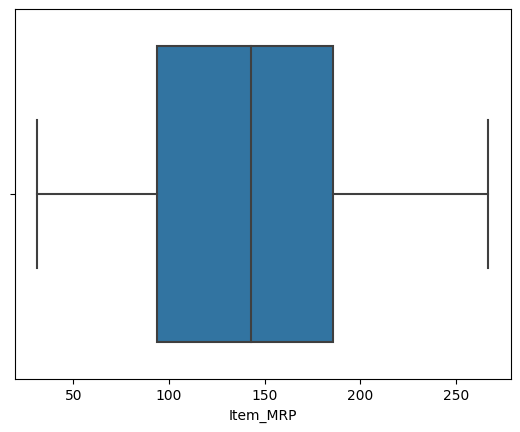

In [276]:
sns.boxplot(x="Item_MRP", data=df);

No se encuentran anomalías

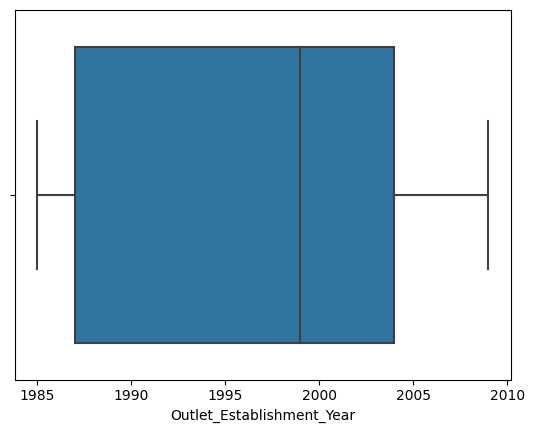

In [278]:
sns.boxplot(x="Outlet_Establishment_Year", data=df);

Ningún valor extraño

"Outlet_Size", "Outlet_Location_Type" y "Outlet_Type" ya fueron trabajadas

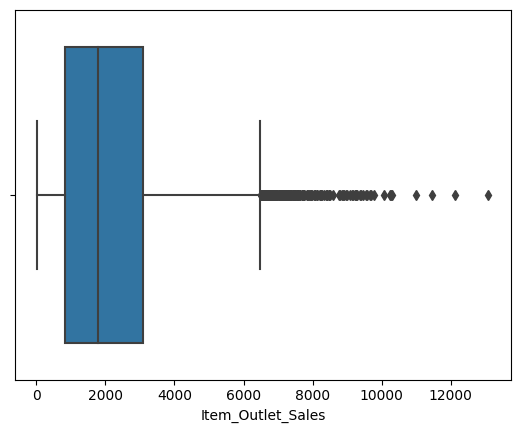

In [282]:
sns.boxplot(x="Item_Outlet_Sales", data=df);

Vemos valores outliers que se encuentran dentro de un rango esperado para un monto de ventas, por lo tanto, no se encuentran anomalías

**Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)**

In [ ]:
Veamos cuáles son nuestras columnas numéricas y usemos la función describe para obtener sus estadísticas resumidas

In [292]:
df.dtypes[df.dtypes!=object]

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [286]:
df["Item_Weight"].describe()

count    8519.000000
mean       12.875420
std         4.646098
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [285]:
df["Item_Visibility"].describe()

count    8519.000000
mean        0.066112
std         0.051586
min         0.000000
25%         0.026983
50%         0.053925
75%         0.094558
max         0.328391
Name: Item_Visibility, dtype: float64

In [287]:
df["Item_MRP"].describe()

count    8519.000000
mean      141.010019
std        62.283594
min        31.290000
25%        93.844900
50%       143.047000
75%       185.676600
max       266.888400
Name: Item_MRP, dtype: float64

In [288]:
df["Outlet_Establishment_Year"].describe()

count    8519.000000
mean     1997.837892
std         8.369105
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [290]:
df["Item_Outlet_Sales"].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [251]:
diccionario


,Nombre de la variable,Descripción
0,Item_Identifier,Identificación única del producto
1,Item_Weight,Peso del producto
2,Item_Fat_Content,Si el producto es bajo en grasa o regular
3,Item_Visibility,Porcentaje de la superficie total de exposició...
4,Item_Type,Categoría a la que el producto pertenece
5,Item_MRP,Precio máximo de venta al público (precio de c...
6,Outlet_Identifier,Identificación única de la tienda
7,Outlet_Establishment_Year,El año en que se estableció la tienda
8,Outlet_Size,El tamaño de la tienda en cuanto al área total
9,Outlet_Location_Type,El tipo de área donde se encuentra la tienda
